**Process Capability Study_Cp & Cpk Study**


**Sunil Kumar**
**K22sunil@gmail.com**

Shapiro-Wilk Test:
Test Statistic: 0.9752545952796936
p-value: 0.3731847405433655
The data appears to be normally distributed (fail to reject H0)

Anderson-Darling Test:
Test Statistic: 0.42671729876384035
Critical Values: [0.538 0.613 0.736 0.858 1.021]
Significance Level: [15.  10.   5.   2.5  1. ]
The data appears to be normally distributed (fail to reject H0)
Estimated Standard Deviation using R bar method: 1.0883131971195183
Cp: 0.9188531413996813
Cpk: 0.9149798828825961


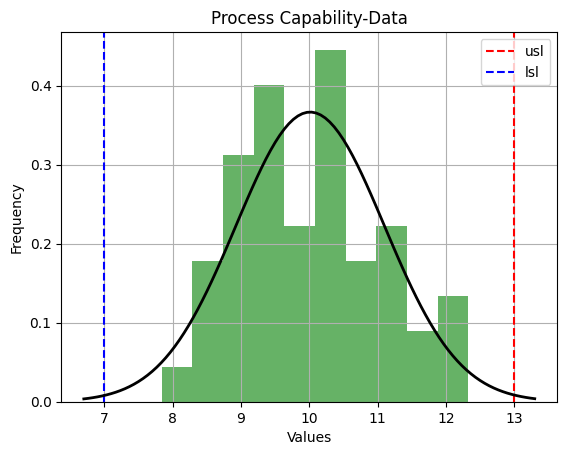

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, anderson
import matplotlib.pyplot as plt
from scipy.stats import norm

# Extract the 'Data' column from the DataFrame
data = df['Data']

# Shapiro-Wilk test
shapiro_stat, shapiro_p_value = shapiro(data)
print("Shapiro-Wilk Test:")
print("Test Statistic:", shapiro_stat)
print("p-value:", shapiro_p_value)
if shapiro_p_value > 0.05:
    print("The data appears to be normally distributed (fail to reject H0)")
else:
    print("The data does not appear to be normally distributed (reject H0)")

# Anderson-Darling test
anderson_stat, anderson_critical_values, anderson_significance_level = anderson(data)
print("\nAnderson-Darling Test:")
print("Test Statistic:", anderson_stat)
print("Critical Values:", anderson_critical_values)
print("Significance Level:", anderson_significance_level)
if anderson_stat < anderson_critical_values[2]:
    print("The data appears to be normally distributed (fail to reject H0)")
else:
    print("The data does not appear to be normally distributed (reject H0)")

def r_bar_d(data, subgroup_size):
    """Calculate R bar d (average range of subgroup ranges)"""
    n_subgroups = len(data) // subgroup_size
    ranges = [np.ptp(data[i:i+subgroup_size]) for i in range(0, len(data), subgroup_size)]
    return np.mean(ranges)

def estimate_std_using_r_bar(data, subgroup_size):
    """Estimate standard deviation using R bar method"""
    r_bar = r_bar_d(data, subgroup_size)
    multipliers = {
        2: 1.128,
        3: 1.693,
        4: 2.059,
        5: 2.326,
        6: 2.534,
        7: 2.704,
        8: 2.847,
        9: 2.970,
        10: 3.078
    }
    multiplier = multipliers.get(subgroup_size, None)
    if multiplier is None:
        raise ValueError("Subgroup size not supported")
    return r_bar / multiplier

def calculate_cp_cpk(data, usl, lsl):
    """Calculate Cp and Cpk"""
    process_mean = np.mean(data)
    std_estimate
    cp = (usl - lsl) / (6 * std_estimate)
    cpk_upper = (usl - process_mean) / (3 * std_estimate)
    cpk_lower = (process_mean - lsl) / (3 * std_estimate)
    cpk = min(cpk_upper, cpk_lower)
    return cp, cpk


# Read the CSV file
df = pd.read_csv("Datatype.csv")

# Extract the 'Data' column from the DataFrame
data = df['Data'].tolist()

# Specification limits
usl = 13
lsl = 7

# Subgroup size (assuming subgrouping method is already applied)
subgroup_size = 5

# Estimate standard deviation using R bar method
std_estimate = estimate_std_using_r_bar(data, subgroup_size)
print("Estimated Standard Deviation using R bar method:", std_estimate)

# Calculate Cp and Cpk
cp, cpk = calculate_cp_cpk(data, usl, lsl)
print("Cp:", cp)
print("Cpk:", cpk)

process_mean = np.mean(data)

# Create histogram
plt.hist(data, bins=10, density=True, alpha=0.6, color='g')

# Plot USL and LSL as vertical lines
plt.axvline(x=usl, color='r', linestyle='--', label='usl')
plt.axvline(x=lsl, color='b', linestyle='--', label='lsl')

# Overlay normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, process_mean, std_estimate)
plt.plot(x, p, 'k', linewidth=2)

plt.title('Process Capability-Data')
plt.xlabel('Values')
plt.ylabel('Frequency')

plt.legend()
plt.grid(True)
plt.show()